<a href="https://colab.research.google.com/github/melihkurtaran/DNA_hackathon/blob/template_matching/MainCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!pip install gif2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for gif2numpy: filename=gif2numpy-1.3-py2.py3-none-any.whl size=8392 sha256=91f2f3d6606ad6eee2fb1b2e867fa5d877ef11194357f61ecf22c9253c71b85d
  Stored in directory: /root/.cache/pip/wheels/7d/70/75/7e42205c427015e223944d47ea89e01dc779fb49ba664fb743
Successfully built gif2numpy


In [3]:
!unzip /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba.zip -d /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/ba/20220123/aemet_ba_202201230640.gif  
  inflating: /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/__MACOSX/ba/20220123/._aemet_ba_202201230640.gif  
  inflating: /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/ba/20220123/aemet_ba_202201230720.gif  
  inflating: /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/__MACOSX/ba/20220123/._aemet_ba_202201230720.gif  
  inflating: /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/ba/20220123/aemet_ba_202201231600.gif  
  inflating: /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/__MACOSX/ba/20220123/._aemet_ba_202201231600.gif  
  inflating: /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/ba/20220123/aemet_ba_202201230250.gif  
  inflating: /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/__MACOSX/ba/20220123/._aemet

In [4]:
import gif2numpy
import cv2
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image,ImageDraw
import os
%matplotlib inline
import numpy as np

In [21]:
data_path = '/content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/'
data = {}
for state in os.listdir(data_path):
  if state[0] =='.' or state[0]=='_':
    continue
  data[state] = {}
  for i in os.listdir(os.path.join(data_path,state)):
    if i[0] =='.' or i[0]=='_':
      continue
    a = i[4:6]
    if i[4:6] not in data[state]:
      data[state][a] = []
    for im in os.listdir(os.path.join(data_path,state, i)):
      if i[0] =='.' or i[0]=='_':
        continue
      data[state][a].append(os.path.join(data_path,state,i,im))

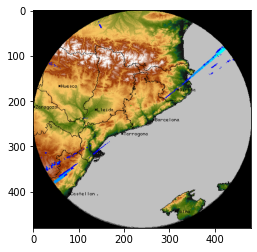

In [149]:

np_frames, extensions, image_specifications = gif2numpy.convert("/content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/20220101/aemet_ba_202201010000.gif")
the_frame = np.array(np_frames[0])
h=the_frame.shape[0]
w=the_frame.shape[1]

the_frame =  the_frame[:w,:,:]
the_frame = cv2.cvtColor(the_frame, cv2.COLOR_BGR2RGB)
the_frame_pil = Image.fromarray(the_frame)
alpha = Image.new('L', (the_frame.shape[0],the_frame.shape[1]),0)
draw = ImageDraw.Draw(alpha)
draw.pieslice([0,0,w,w],0,360, fill=255)
npAlpha=np.array(alpha)
npAlpha=np.stack([npAlpha,npAlpha,npAlpha],axis=2)
the_frame = (the_frame/255) * (npAlpha/255)
the_frame = np.uint8(the_frame*255)


imshow(the_frame)

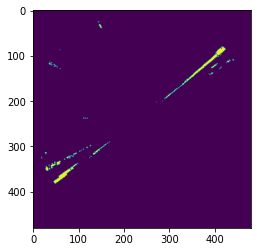

In [150]:
hsv = cv2.cvtColor(the_frame, cv2.COLOR_RGB2HSV)
lower_blue = np.array([87,0,0])
upper_blue = np.array([136,255,255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
imshow(mask)
  

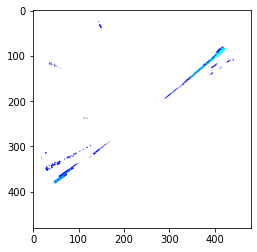

In [151]:
mask = np.stack([mask,mask,mask],axis=2)
result = cv2.bitwise_and(the_frame, mask)
result[mask==0] = 255
imshow(result)
mask = result

In [154]:
mask.shape

(480, 480, 3)

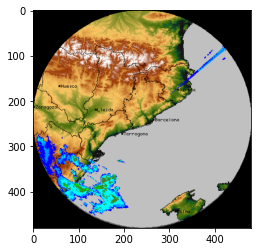

In [152]:
cloud_frame = '/content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/20220419/aemet_ba_202204190000.gif'
np_frames, extensions, image_specifications = gif2numpy.convert(cloud_frame)
cloud_frame = np.array(np_frames[0])
h=cloud_frame.shape[0]
w=cloud_frame.shape[1]

cloud_frame =  cloud_frame[:w,:,:]
cloud_frame = cv2.cvtColor(cloud_frame, cv2.COLOR_BGR2RGB)
the_frame_pil = Image.fromarray(cloud_frame)
alpha = Image.new('L', (cloud_frame.shape[0],cloud_frame.shape[1]),0)
draw = ImageDraw.Draw(alpha)
draw.pieslice([0,0,w,w],0,360, fill=255)
npAlpha=np.array(alpha)
npAlpha=np.stack([npAlpha,npAlpha,npAlpha],axis=2)
cloud_frame = (cloud_frame/255) * (npAlpha/255)
cloud_frame = np.uint8(cloud_frame*255)


imshow(cloud_frame)

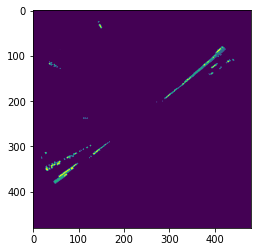

In [157]:
imshow(1-template)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img2 = cloud_frame.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
template = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [160]:
from scipy import signal
cor = signal.correlate2d(template, img2)
cor

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [161]:
cor.sum()

110309208

In [163]:
img3 = cv2.cvtColor(the_frame, cv2.COLOR_RGB2GRAY)
cor1 = signal.correlate2d(template, img3)

In [164]:
cor1.sum()

110025422

In [166]:
cor.sum()-cor1.sum()

283786